In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
covid_data = pd.read_csv('covidset.csv')

In [4]:
covid_data
covid_data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp'],
      dtype='object')

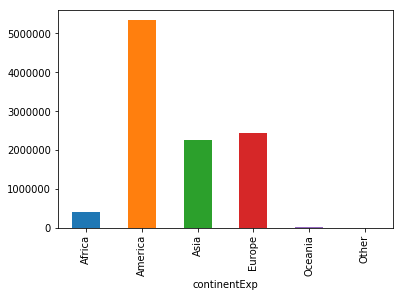

In [5]:
#Total cases per continent
covid_data.groupby('continentExp')['cases'].sum().plot(kind='bar')

In [6]:
#Eliminate continent other

covid_data['continentExp'].unique()
covid_data[covid_data['continentExp'] == 'Other']['countriesAndTerritories'].unique()
covid_data['countriesAndTerritories']=covid_data['countriesAndTerritories'].replace('Cases_on_an_international_conveyance_Japan','Japan')
covid_data[covid_data['continentExp'] == 'Other']['countriesAndTerritories'].unique()
covid_data['continentExp']=covid_data['continentExp'].replace('Other','Asia')

In [7]:
continental_data =covid_data.groupby('continentExp')['cases'].sum()
continental_data=continental_data.reset_index()

In [8]:
continental_data

continentExp    cases
0       Africa   405076
1      America  5327057
2         Asia  2262099
3       Europe  2442700
4      Oceania     9421

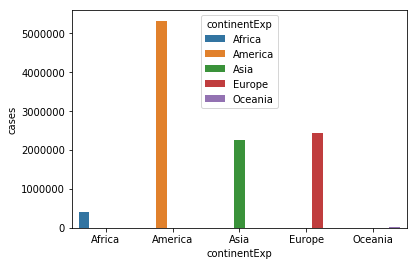

In [9]:
ax= sns.barplot(x = 'continentExp', y = 'cases', data = continental_data, hue='continentExp')

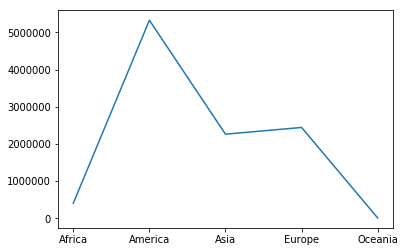

In [10]:
plt.plot(continental_data['continentExp'],continental_data['cases'])
#plt.plot(continental_data['continentExp'],continental_data['cases'], marker='s',markersize=10,markerfacecolor="black")

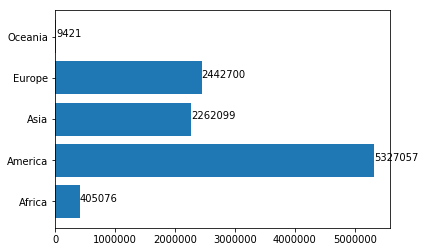

In [11]:
#plt.barh(continental_data['continentExp'],continental_data['cases'])
x=continental_data['continentExp']
y=continental_data['cases']
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value,index,str(value))

Text(0, 0.5, 'Continents')

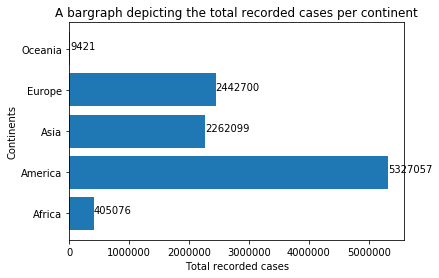

In [12]:
x=continental_data['continentExp']
y=continental_data['cases']
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value,index,str(value))
    
plt.title('A bargraph depicting the total recorded cases per continent')
plt.xlabel('Total recorded cases')
plt.ylabel('Continents')

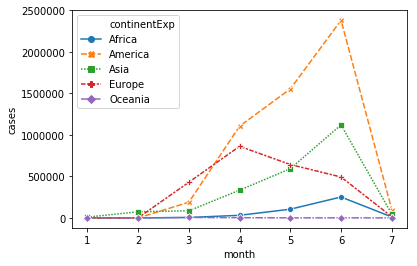

In [13]:
#Number of total cases in each continent over time
#Eliminate 2019
covid_data=covid_data[covid_data['year']==2020]
totalContinent_per_month = covid_data.groupby(['month','continentExp'])['cases'].sum()
totalContinent_per_month= totalContinent_per_month.reset_index()
totalContinent_per_month
ax = sns.lineplot(x = 'month', y = 'cases', data = totalContinent_per_month, hue = 'continentExp', style = 'continentExp', ci=False, markers=True)

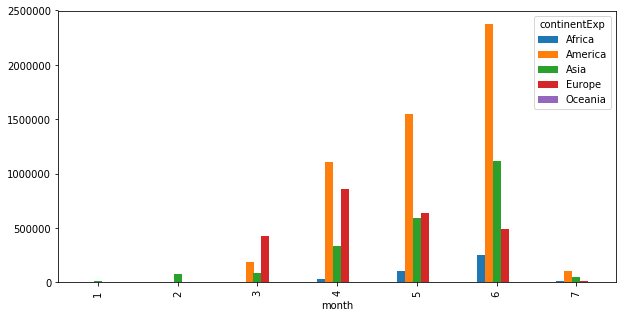

In [14]:
totalContinent_per_month = covid_data.groupby(['month','continentExp'])[['cases','deaths']].sum()
totalContinent_per_month= totalContinent_per_month.reset_index()
totalContinent_per_month
 
totalContinent_per_month.groupby(['month','continentExp']).sum()['cases'].unstack().plot(kind='bar', figsize=(10,5))

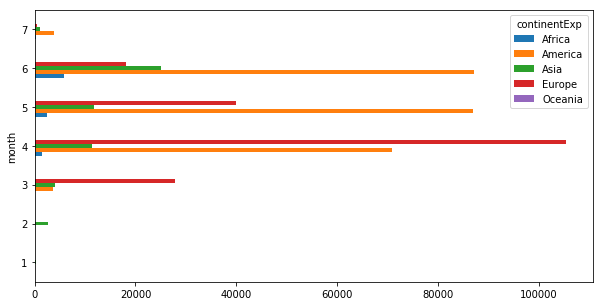

In [15]:
totalContinent_per_month.groupby(['month','continentExp']).sum()['deaths'].unstack().plot(kind='barh', figsize=(10,5))

In [16]:
#Analysis on Africa over time
africa_data = covid_data[covid_data['continentExp'] == 'Africa']
africa_data = africa_data.reset_index(drop=True)
africa_data['countriesAndTerritories'].nunique()
CountryAfrica=africa_data.groupby('countriesAndTerritories')[['cases','deaths']].sum()
CountryAfrica=CountryAfrica.reset_index()
CountryAfrica.sort_values(by='cases')
MostAffectedCountries=CountryAfrica[CountryAfrica['cases']>10000]
MostAffectedCountries


countriesAndTerritories   cases  deaths
0                  Algeria   13907     912
6                 Cameroon   12592     313
15                   Egypt   68311    2953
22                   Ghana   17741     112
34                 Morocco   12533     228
38                 Nigeria   25694     590
45            South_Africa  151209    2657

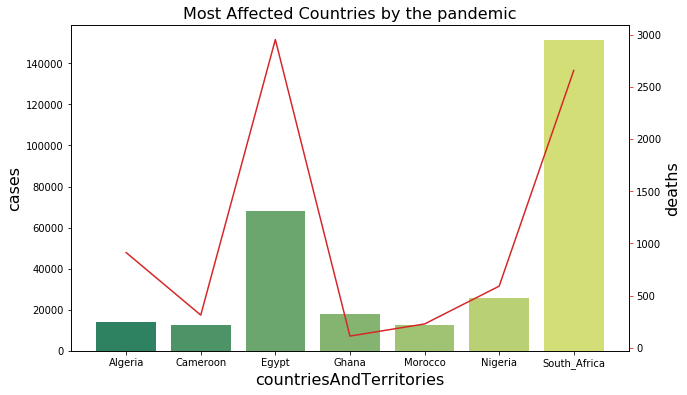

In [17]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Most Affected Countries by the pandemic', fontsize=16)
ax1.set_xlabel('African Country', fontsize=16)
ax1.set_ylabel('Cases Registered', fontsize=16)
ax1 = sns.barplot(x='countriesAndTerritories', y='cases', data = MostAffectedCountries, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Covid_deaths', fontsize=16)
ax2 = sns.lineplot(x='countriesAndTerritories', y='deaths', data = MostAffectedCountries, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [18]:
#CaseOfUganda
Uganda_data = covid_data[covid_data['countriesAndTerritories']== 'Uganda']
Uganda_data
Uganda_data.groupby('month').sum()[['cases','deaths']]

cases  deaths
month               
3         33       0
4         48       0
5        332       0
6        457       0
7         19       0

In [19]:
Uganda_cases =Uganda_data.groupby('month').sum()[['cases']]
Uganda_cases=Uganda_cases.reset_index()
y=Uganda_cases['cases']

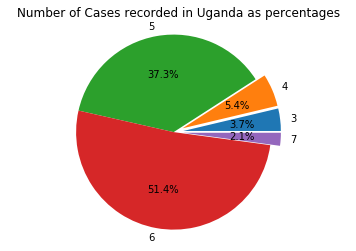

In [20]:
#Uganda_cases.plot(y,kind='pie')
labels= Uganda_cases['month']
explode = (0.1, 0.1, 0, 0,0.1)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode,labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Number of Cases recorded in Uganda as percentages')
plt.show()

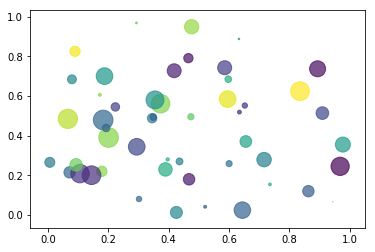

In [27]:
N= 50 
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sizes = (20*np.random.rand(N))**2
plt.scatter (x,y,s=sizes, c= colors, alpha=0.7)
plt.show()

In [28]:
#WordClouds with Social Media Data
from wordcloud import WordCloud

In [43]:
MoH=open('100_text_MoHwords.txt','r', encoding='utf-8')

Top100Words = (MoH.read())
Top100Words

'covid health 19 uganda case ministry confirmed today dr quarantine 0800 public sample support country measure like hand call entebbe symptom 2020 general stay free suspected follow disease visit ー19 100 hospital team ugandan negative service tested atwine total national 203 033 flu equipment screening march international coronavirus new 1 day airport prevent self diana risk self-quarantine surveillance currently ️ 2 4 part baby district traveller high traveler spread received 066 3 hc avoid government ensure alcohol outbreak preventive least remain also water old mosquito 14 jane line pm toll secretary permanent institutional 5 aceng 00 issued social presented net'

In [44]:
Top100Words

'covid health 19 uganda case ministry confirmed today dr quarantine 0800 public sample support country measure like hand call entebbe symptom 2020 general stay free suspected follow disease visit ー19 100 hospital team ugandan negative service tested atwine total national 203 033 flu equipment screening march international coronavirus new 1 day airport prevent self diana risk self-quarantine surveillance currently ️ 2 4 part baby district traveller high traveler spread received 066 3 hc avoid government ensure alcohol outbreak preventive least remain also water old mosquito 14 jane line pm toll secretary permanent institutional 5 aceng 00 issued social presented net'

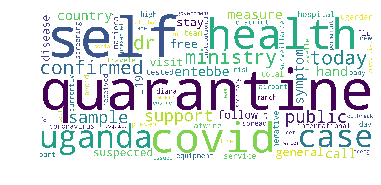

In [45]:
wordcloud = WordCloud(background_color = 'white', width=7600, height=3400).generate(Top100Words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Top100WordsMoH-March.png', dpi=500)

plt.show()

In [46]:
MedHses=open('100_text_CBSMrcwords.txt','r', encoding='utf-8')

MediaHseTop100Words = (MedHses.read())
MediaHseTop100Words

"naye nze uganda u bobi president kati nti hotel thanks abantu ate god 🙏 e corona rip 😭 oba wine nyo people cbs song good buli mr virus ffe nnyo government kuba maama kwendi oyo abo mukama kubanga wano ye message katonda m7 ekyo thank kyagulanyi banange day ebyo drop ba bebe mbu museveni covid omuntu time wa 😂 kale sente ya love eno big 2021 omu kabaka 19 nice awo 👏 security ki mwebale need 🤔 🤣 man bambi may happy bantu ugandan bless sorry wabula can't best gavumenti nrm first come service must like bwa kino even abamu"

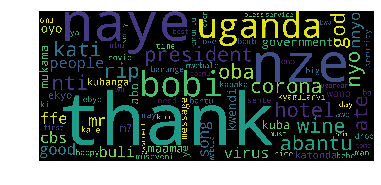

In [47]:
wordcloud = WordCloud(background_color = 'black', width=7600, height=3400).generate(MediaHseTop100Words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Top100WordsMediaHse-March.png', dpi=500)

plt.show()